In [1]:
#忽略警告
import warnings
warnings.filterwarnings("ignore")

#数据整理
import numpy as np #线性代数矩阵运算
import pandas as pd #作数据处理，CSV文件读入
#可视化
import matplotlib.pyplot as plt #绘图
import seaborn as sns #导入seaborn统计绘图库
from colorama import Fore, Back, Style #导入colorama模块，格式颜色
from mlxtend.plotting import plot_confusion_matrix #导入mlxtend扩展库，混淆矩阵绘制
import plotly as py #调用plotly可视化库
import plotly.graph_objs as go #生成图形对象
import plotly.express as px #plotly简化接口
import plotly.figure_factory as ff #图表工厂类快捷函数
#plotly.offline.init_notebook_mode(connected=True) #离线运行

#模型
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.svm import SVC #支持向量机分类
from sklearn.neighbors import KNeighborsClassifier #KNN-K近邻
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn.ensemble import GradientBoostingClassifier #梯度提升树
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯

#模型评估
from sklearn.model_selection import train_test_split #划分数据集
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score   #混淆矩阵、准确率、精确率、召回率、F1值
from sklearn.metrics import roc_curve, auc

In [2]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
#EDA


## 年龄分布直方图
hist_data =[heart_data["age"].values]
group_labels = ['年龄']
fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='年龄分布图')
fig.show()

In [10]:
## 性别分布盒须图
fig = px.box(heart_data, x='sex', y='age', points="all")
fig.update_layout(title_text="性别-年龄分布 男性 = 1 女性 =0")
fig.show()

In [11]:
## 年龄与死亡事件的关系
surv = heart_data[heart_data["DEATH_EVENT"]==0]["age"]
not_surv = heart_data[heart_data["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['生存', '死亡']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text="年龄与生存状态分析")
fig.show()

In [69]:
## 性别与死亡事件的关系（饼图）
male = heart_data[heart_data["sex"]==1]
female = heart_data[heart_data["sex"]==0]
male_survi = male[heart_data["DEATH_EVENT"]==0]
male_not = male[heart_data["DEATH_EVENT"]==1]
female_survi = female[heart_data["DEATH_EVENT"]==0]
female_not = female[heart_data["DEATH_EVENT"]==1]
labels = ['男性 - 生存','男性 - 死亡', "女性 - 生存", "女性 - 死亡"]
values = [len(male_survi),len(male_not),len(female_survi),len(female_not)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="性别与生存状态分析")
fig.show()

In [17]:
## 年龄性别与死亡事件的关系
fig = px.violin(heart_data, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="年龄、性别与生存状态分析")
fig.show()

In [68]:
## 糖尿病与死亡事件的关系
diabetes_yes = heart_data[heart_data['diabetes']==1]
diabetes_no = heart_data[heart_data['diabetes']==0]
diabetes_yes_survi = diabetes_yes[heart_data["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[heart_data["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[heart_data["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[heart_data["DEATH_EVENT"]==1]
labels = ['患有糖尿病 - 生存','患有糖尿病 - 死亡', '不患有糖尿病 - 生存', '不患有糖尿病 - 死亡']
values = [len(diabetes_yes_survi),len(diabetes_yes_not_survi),len(diabetes_no_survi),len(diabetes__no_not_survi)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="糖尿病与生存状态分析")
fig.show()

In [30]:
## 年龄糖尿病与死亡事件的关系
fig = px.violin(heart_data, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="年龄、糖尿病与生存状态分析")
fig.show()

In [65]:
## 吸烟与死亡事件的关系
smoking_yes = heart_data[heart_data['smoking']==1]
smoking_no = heart_data[heart_data['smoking']==0]
smoking_yes_survi = smoking_yes[heart_data["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[heart_data["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[heart_data["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[heart_data["DEATH_EVENT"]==1]
labels = ['吸烟 - 生存','吸烟 - 死亡', '不吸烟 - 生存', '不吸烟 - 死亡']
values = [len(smoking_yes_survi),len(smoking_yes_not_survi),len(smoking_no_survi),len(smoking_no_not_survi)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="吸烟与生存状态分析")
fig.show()

In [33]:
## 年龄吸烟与死亡事件的关系
fig = px.violin(heart_data, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="年龄、吸烟与生存状态分析")
fig.show()

In [66]:
## 贫血与死亡事件的关系
anaemia_yes = heart_data[heart_data['anaemia']==1]
anaemia_no = heart_data[heart_data['anaemia']==0]
anaemia_yes_survi = anaemia_yes[heart_data["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[heart_data["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[heart_data["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[heart_data["DEATH_EVENT"]==1]
labels = ['贫血 - 生存','贫血 - 死亡', '不贫血 - 生存', '不贫血 - 死亡']
values = [len(anaemia_yes_survi),len(anaemia_yes_not_survi),len(anaemia_no_survi),len(anaemia_no_not_survi)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="贫血与生存状态分析")
fig.show()

In [36]:
## 年龄贫血与死亡事件的关系
fig = px.violin(heart_data, y="age", x="anaemia", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="年龄、贫血与生存状态分析")
fig.show()

In [67]:
## 高血压与死亡事件的关系
hbp_yes = heart_data[heart_data['high_blood_pressure']==1]
hbp_no = heart_data[heart_data['high_blood_pressure']==0]
hbp_yes_survi = hbp_yes[heart_data["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[heart_data["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[heart_data["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[heart_data["DEATH_EVENT"]==1]
labels = ['患有高血压 - 生存','患有高血压 - 死亡', '没有高血压 - 生存', '没有高血压 - 死亡']
values = [len(hbp_yes_survi),len(hbp_yes_not_survi),len(hbp_no_survi),len(hbp_no_not_survi)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="高血压与生存状态分析")
fig.show()

In [39]:
## 年龄高血压与死亡事件的关系
fig = px.violin(heart_data, y="age", x="high_blood_pressure", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="年龄、高血压与生存状态分析")
fig.show()

In [40]:
## 磷酸肌酸激酶
fig = px.histogram(heart_data, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [41]:
## 血小板
fig = px.histogram(heart_data, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [42]:
## 射血分数
fig = px.histogram(heart_data, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [43]:
## 射血分数分析
surv = heart_data[heart_data['DEATH_EVENT']==0]['ejection_fraction']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['生存', '死亡']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text="射血分数与生存状态分析")
fig.show()

In [44]:
## 血肌酐水平
fig = px.histogram(heart_data, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [45]:
## 血肌酐水平分析
surv = heart_data[heart_data['DEATH_EVENT']==0]['serum_creatinine']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['生存', '死亡']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text="血肌酐水平与生存状态分析")
fig.show()

In [47]:
## 血清钠水平
fig = px.histogram(heart_data, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=heart_data.columns)
fig.show()

In [48]:
## 血清钠水平分析
surv = heart_data[heart_data['DEATH_EVENT']==0]['serum_sodium']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['生存', '死亡']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text="血清钠水平与生存状态分析")
fig.show()

<AxesSubplot:>

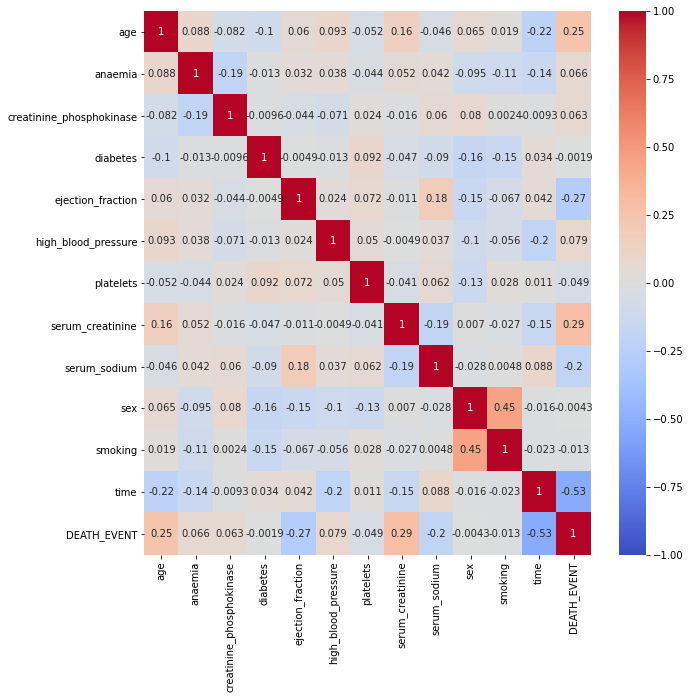

In [52]:
## 热图相关性分析
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(), vmin=-1, cmap='coolwarm', annot=True)

In [3]:
#模型
## 划分训练集和测试集，比例为0.3,种子为1
Features = ['ejection_fraction','serum_creatinine','serum_sodium','time','age']
x = heart_data[Features]
y = heart_data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
# train_set,test_set = train_test_split(y,test_size=0.3,random_state=1)
# train_data = pd.DataFrame(train_set)
# test_data = pd.DataFrame(test_set)
# print("训练集分布\n",train_data['DEATH_EVENT'].value_counts() / len(train_data))
# print("测试集分布\n",test_data['DEATH_EVENT'].value_counts() / len(test_data))
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

逻辑回归训练集准确率 : 85.17%
逻辑回归测试集准确率 : 83.33%
逻辑回归训练集精确率 : 79.10%
逻辑回归测试集精确率 : 73.91%
逻辑回归训练集召回率 : 75.71%
逻辑回归测试集召回率 : 65.38%
逻辑回归训练集F1值 : 77.37%
逻辑回归测试集F1值 : 69.39%


<Figure size 432x288 with 0 Axes>

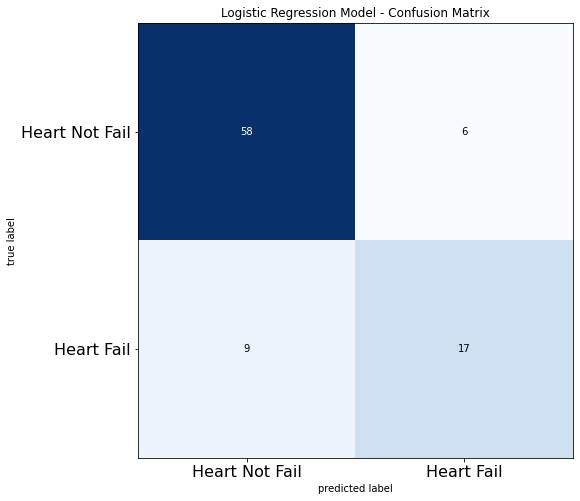

In [46]:
## 逻辑回归
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg_train_pred = log_reg.predict(x_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_train_acc = accuracy_score(y_train,log_reg_train_pred)
log_reg_acc = accuracy_score(y_test,log_reg_pred)
accuracy_list.append(100*log_reg_acc)
log_reg_train_prec = precision_score(y_train,log_reg_train_pred)
log_reg_prec = precision_score(y_test,log_reg_pred)
precision_list.append(100*log_reg_prec)
log_reg_train_rec = recall_score(y_train,log_reg_train_pred)
log_reg_rec = recall_score(y_test,log_reg_pred)
recall_list.append(100*log_reg_rec)
log_reg_train_f1 = f1_score(y_train,log_reg_train_pred)
log_reg_f1 = f1_score(y_test,log_reg_pred)
f1_list.append(100*log_reg_f1)
print("逻辑回归训练集准确率 :", "{:.2f}%".format(100*log_reg_train_acc))
print("逻辑回归测试集准确率 :", "{:.2f}%".format(100*log_reg_acc))
print("逻辑回归训练集精确率 :", "{:.2f}%".format(100*log_reg_train_prec))
print("逻辑回归测试集精确率 :", "{:.2f}%".format(100*log_reg_prec))
print("逻辑回归训练集召回率 :", "{:.2f}%".format(100*log_reg_train_rec))
print("逻辑回归测试集召回率 :", "{:.2f}%".format(100*log_reg_rec))
print("逻辑回归训练集F1值 :", "{:.2f}%".format(100*log_reg_train_f1))
print("逻辑回归测试集F1值 :", "{:.2f}%".format(100*log_reg_f1))
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.show()

AUC值:  0.8840144230769231


<Figure size 432x288 with 0 Axes>

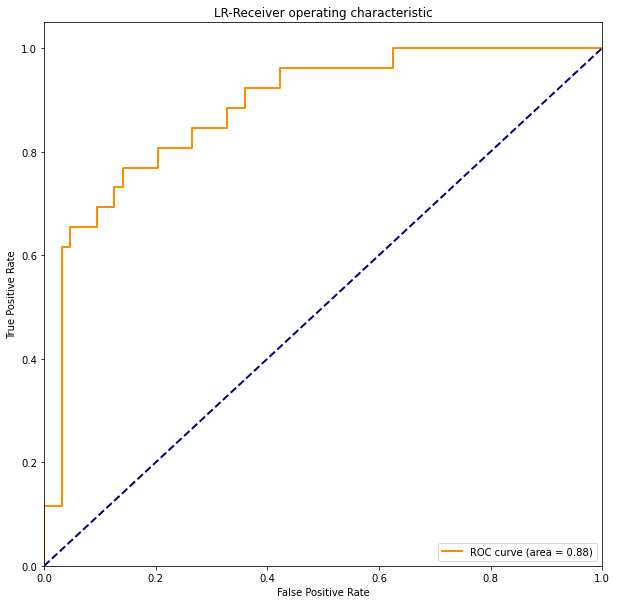

In [27]:
### 逻辑回归ROC&AUC
log_reg = LogisticRegression()
y_score = log_reg.fit(x_train,y_train).decision_function(x_test)
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print("AUC值: ",roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR-Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

支持向量机训练集准确率 : 84.21%
支持向量机测试集准确率 : 86.67%
支持向量机训练集精确率 : 86.27%
支持向量机测试集精确率 : 88.89%
支持向量机训练集召回率 : 62.86%
支持向量机测试集召回率 : 61.54%
支持向量机训练集F1值 : 62.86%
支持向量机测试集F1值 : 61.54%


<Figure size 432x288 with 0 Axes>

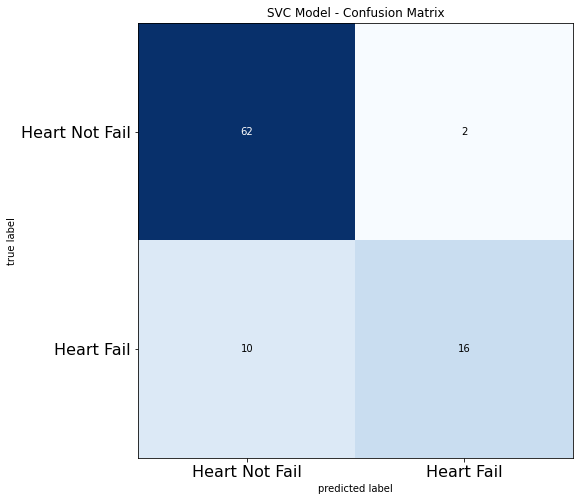

In [47]:
## SVC
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_train_pred = sv_clf.predict(x_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_train_acc = accuracy_score(y_train, sv_clf_train_pred)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100*sv_clf_acc)
sv_clf_train_prec = precision_score(y_train, sv_clf_train_pred)
sv_clf_prec = precision_score(y_test, sv_clf_pred)
precision_list.append(100*sv_clf_prec)
sv_clf_train_rec = recall_score(y_train, sv_clf_train_pred)
sv_clf_rec = recall_score(y_test, sv_clf_pred)
recall_list.append(100*sv_clf_rec)
sv_clf_train_f1 = recall_score(y_train, sv_clf_train_pred)
sv_clf_f1 = recall_score(y_test, sv_clf_pred)
f1_list.append(100*sv_clf_f1)
print("支持向量机训练集准确率 :", "{:.2f}%".format(100*sv_clf_train_acc))
print("支持向量机测试集准确率 :", "{:.2f}%".format(100*sv_clf_acc))
print("支持向量机训练集精确率 :", "{:.2f}%".format(100*sv_clf_train_prec))
print("支持向量机测试集精确率 :", "{:.2f}%".format(100*sv_clf_prec))
print("支持向量机训练集召回率 :", "{:.2f}%".format(100*sv_clf_train_rec))
print("支持向量机测试集召回率 :", "{:.2f}%".format(100*sv_clf_rec))
print("支持向量机训练集F1值 :", "{:.2f}%".format(100*sv_clf_train_f1))
print("支持向量机测试集F1值 :", "{:.2f}%".format(100*sv_clf_f1))
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.show()

AUC值:  0.8010817307692307


<Figure size 432x288 with 0 Axes>

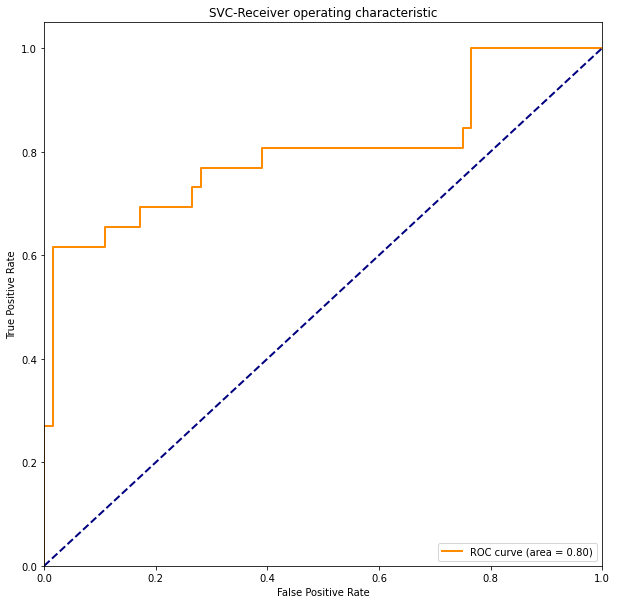

In [29]:
### SVM ROC&AUC
sv_clf = SVC()
y_score = sv_clf.fit(x_train,y_train).decision_function(x_test)
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print("AUC值: ",roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC-Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

K邻近算法训练集准确率 : 86.60%
K邻近算法测试集准确率 : 86.67%
K邻近算法训练集精确率 : 88.89%
K邻近算法测试集精确率 : 93.75%
K邻近算法训练集召回率 : 68.57%
K邻近算法测试集召回率 : 57.69%
K邻近算法训练集F1值 : 77.42%
K邻近算法测试集F1值 : 71.43%


<Figure size 432x288 with 0 Axes>

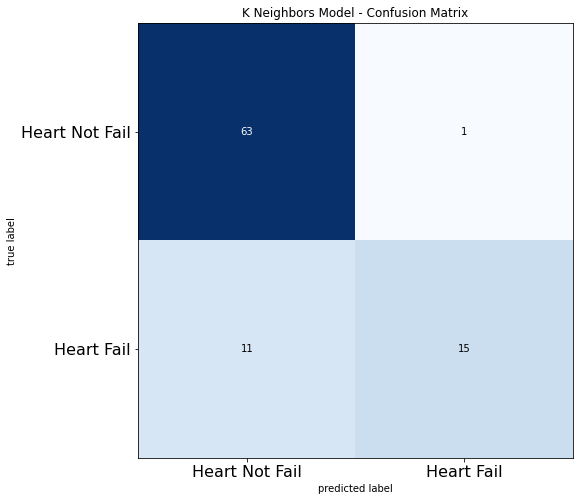

In [48]:
## KNN
kn_clf = KNeighborsClassifier(n_neighbors=6, algorithm='auto', weights='uniform')
kn_clf.fit(x_train, y_train)
kn_train_pred = kn_clf.predict(x_train)
kn_pred = kn_clf.predict(x_test)
kn_train_acc = accuracy_score(y_train, kn_train_pred)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)
kn_train_prec = precision_score(y_train, kn_train_pred)
kn_prec = precision_score(y_test, kn_pred)
precision_list.append(100*kn_prec)
kn_train_rec = recall_score(y_train, kn_train_pred)
kn_rec = recall_score(y_test, kn_pred)
recall_list.append(100*kn_rec)
kn_train_f1 = f1_score(y_train, kn_train_pred)
kn_f1 = f1_score(y_test, kn_pred)
f1_list.append(100*kn_f1)
print("K邻近算法训练集准确率 :", "{:.2f}%".format(100*kn_train_acc))
print("K邻近算法测试集准确率 :", "{:.2f}%".format(100*kn_acc))
print("K邻近算法训练集精确率 :", "{:.2f}%".format(100*kn_train_prec))
print("K邻近算法测试集精确率 :", "{:.2f}%".format(100*kn_prec))
print("K邻近算法训练集召回率 :", "{:.2f}%".format(100*kn_train_rec))
print("K邻近算法测试集召回率 :", "{:.2f}%".format(100*kn_rec))
print("K邻近算法训练集F1值 :", "{:.2f}%".format(100*kn_train_f1))
print("K邻近算法测试集F1值 :", "{:.2f}%".format(100*kn_f1))
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.show()

AUC值:  0.8635817307692307


<Figure size 432x288 with 0 Axes>

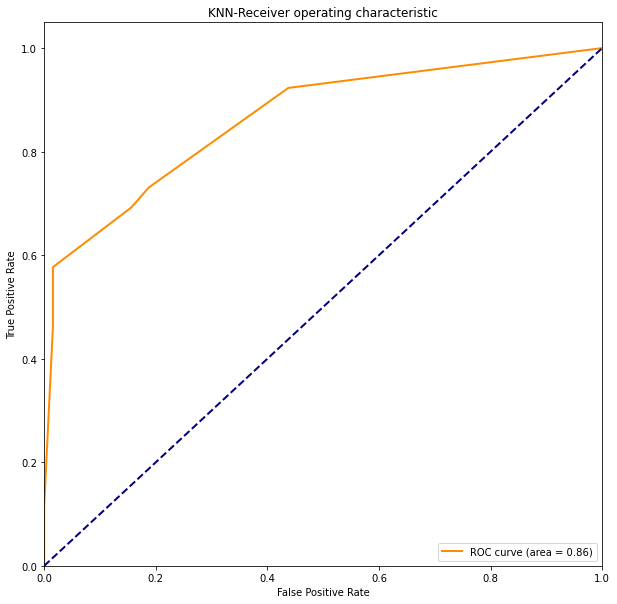

In [36]:
## KNN ROC&AUC
kn_clf = KNeighborsClassifier(n_neighbors=6, algorithm='auto', weights='uniform')
kn_clf.fit(x_train,y_train)
y_score = kn_clf.predict_proba(x_test)[:, 1]###返回预测属于第二维（positive）标签的概率
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print("AUC值: ",roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN-Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

决策树训练集准确率 : 100.00%
决策树测试集准确率 : 85.56%
决策树训练集精确率 : 100.00%
决策树测试集精确率 : 76.00%
决策树训练集召回率 : 100.00%
决策树测试集召回率 : 73.08%
决策树训练集F1值 : 100.00%
决策树测试集F1值 : 74.51%


<Figure size 432x288 with 0 Axes>

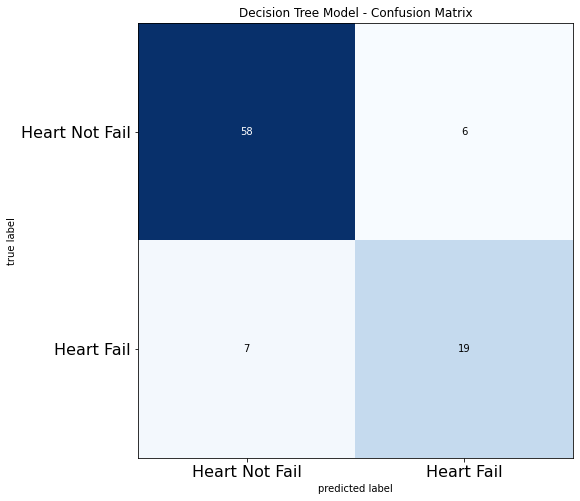

In [49]:
## 决策树
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_train_pred = dt_clf.predict(x_train)
dt_pred = dt_clf.predict(x_test)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
dt_train_prec = precision_score(y_train, dt_train_pred)
dt_prec = precision_score(y_test, dt_pred)
precision_list.append(100*dt_prec)
dt_train_rec = recall_score(y_train, dt_train_pred)
dt_rec = recall_score(y_test, dt_pred)
recall_list.append(100*dt_rec)
dt_train_f1 = f1_score(y_train, dt_train_pred)
dt_f1 = f1_score(y_test, dt_pred)
f1_list.append(100*dt_f1)
print("决策树训练集准确率 :", "{:.2f}%".format(100*dt_train_acc))
print("决策树测试集准确率 :", "{:.2f}%".format(100*dt_acc))
print("决策树训练集精确率 :", "{:.2f}%".format(100*dt_train_prec))
print("决策树测试集精确率 :", "{:.2f}%".format(100*dt_prec))
print("决策树训练集召回率 :", "{:.2f}%".format(100*dt_train_rec))
print("决策树测试集召回率 :", "{:.2f}%".format(100*dt_rec))
print("决策树训练集F1值 :", "{:.2f}%".format(100*dt_train_f1))
print("决策树测试集F1值 :", "{:.2f}%".format(100*dt_f1))
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.show()

AUC值:  0.8377403846153846


<Figure size 432x288 with 0 Axes>

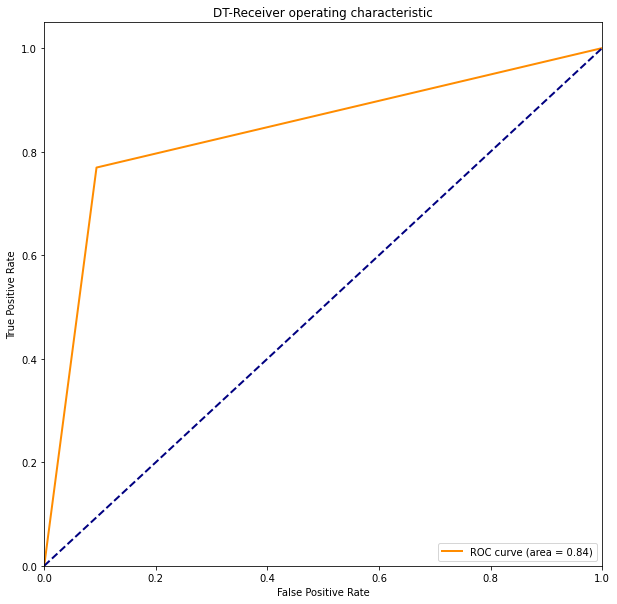

In [58]:
## DT ROC&AUC
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(x_train,y_train)
y_score = dt_clf.predict_proba(x_test)[:, 1]###返回预测属于第二维（positive）标签的概率
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print("AUC值: ",roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT-Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

随机森林训练集准确率 : 100.00%
随机森林测试集准确率 : 86.67%
随机森林训练集精确率 : 100.00%
随机森林测试集精确率 : 75.00%
随机森林训练集召回率 : 100.00%
随机森林测试集召回率 : 80.77%
随机森林训练集F1值 : 100.00%
随机森林测试集F1值 : 77.78%


<Figure size 432x288 with 0 Axes>

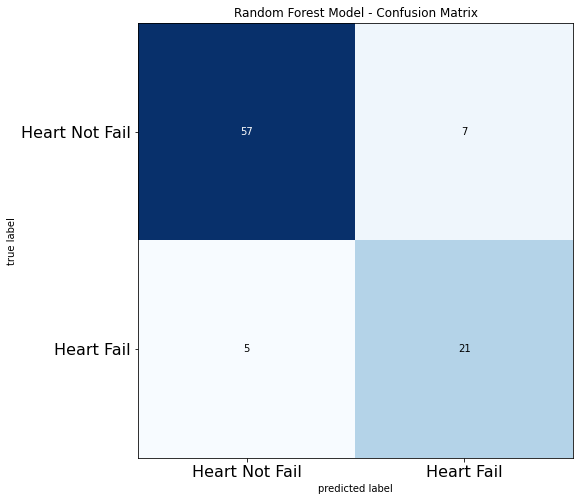

In [14]:
## 随机森林
r_clf = RandomForestClassifier(n_estimators=10000)
r_clf.fit(x_train, y_train)
r_train_pred = r_clf.predict(x_train)
r_pred = r_clf.predict(x_test)
r_train_acc = accuracy_score(y_train, r_train_pred)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)
r_train_prec = precision_score(y_train, r_train_pred)
r_prec = precision_score(y_test, r_pred)
precision_list.append(100*r_prec)
r_train_rec = recall_score(y_train, r_train_pred)
r_rec = recall_score(y_test, r_pred)
recall_list.append(100*r_rec)
r_train_f1 = f1_score(y_train, r_train_pred)
r_f1 = f1_score(y_test, r_pred)
f1_list.append(100*r_f1)
print("随机森林训练集准确率 :", "{:.2f}%".format(100*r_train_acc))
print("随机森林测试集准确率 :", "{:.2f}%".format(100*r_acc))
print("随机森林训练集精确率 :", "{:.2f}%".format(100*r_train_prec))
print("随机森林测试集精确率 :", "{:.2f}%".format(100*r_prec))
print("随机森林训练集召回率 :", "{:.2f}%".format(100*r_train_rec))
print("随机森林测试集召回率 :", "{:.2f}%".format(100*r_rec))
print("随机森林训练集F1值 :", "{:.2f}%".format(100*r_train_f1))
print("随机森林测试集F1值 :", "{:.2f}%".format(100*r_f1))
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.show()

AUC值:  0.9290865384615385


<Figure size 432x288 with 0 Axes>

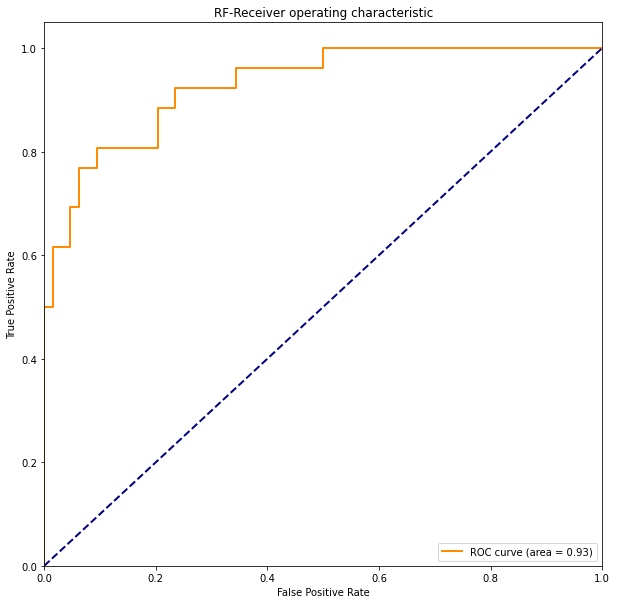

In [59]:
## RF ROC&AUC
r_clf = RandomForestClassifier()
r_clf.fit(x_train,y_train)
y_score = r_clf.predict_proba(x_test)[:, 1]###返回预测属于第二维（positive）标签的概率
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print("AUC值: ",roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF-Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
## 梯度提升参数优化
from  sklearn.model_selection import GridSearchCV
param_dic = {'n_estimators': range(20,81,10)}                                                                   
gscv = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,                 
                                                             min_samples_leaf=20, max_depth=8, max_features='sqrt',
                                                             subsample=0.8, random_state=10),                      
                        param_grid=param_dic, scoring='roc_auc', iid=False, cv=5)                                  
gscv.fit(x_train, y_train)                                                                                         
print('best_params:{0}'.format(gscv.best_params_))                                                                 
print('best_score:{0}'.format(gscv.best_score_))      

best_params:{'n_estimators': 20}
best_score:0.5


梯度提升训练集准确率 : 100.00%
梯度提升测试集准确率 : 90.00%
梯度提升训练集精确率 : 100.00%
梯度提升测试集精确率 : 84.00%
梯度提升训练集召回率 : 100.00%
梯度提升测试集召回率 : 80.77%
梯度提升训练集F1值 : 100.00%
梯度提升测试集F1值 : 82.35%


<Figure size 432x288 with 0 Axes>

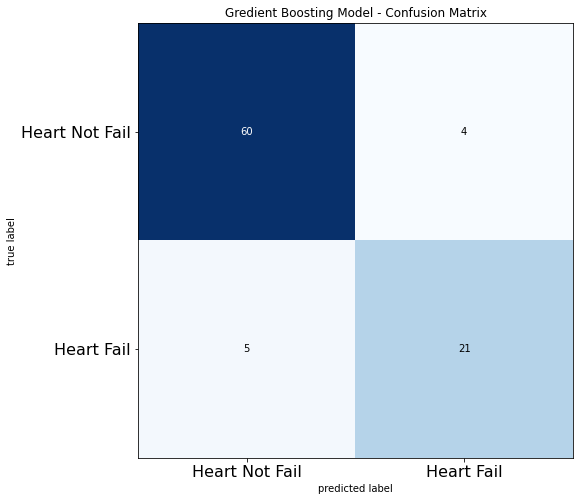

In [60]:
## 梯度提升
gb_clf = GradientBoostingClassifier(n_estimators=200,max_depth=6)
gb_clf.fit(x_train,y_train)
gb_train_pred = gb_clf.predict(x_train)
gb_pred = gb_clf.predict(x_test)
gb_train_acc = accuracy_score(y_train, gb_train_pred)
gb_acc = accuracy_score(y_test, gb_pred)
accuracy_list.append(100*gb_acc)
gb_train_prec = precision_score(y_train, gb_train_pred)
gb_prec = precision_score(y_test, gb_pred)
precision_list.append(100*gb_prec)
gb_train_rec = recall_score(y_train, gb_train_pred)
gb_rec = recall_score(y_test, gb_pred)
recall_list.append(100*gb_rec)
gb_train_f1 = f1_score(y_train, gb_train_pred)
gb_f1 = f1_score(y_test, gb_pred)
f1_list.append(100*gb_f1)
print("梯度提升训练集准确率 :", "{:.2f}%".format(100*gb_train_acc))
print("梯度提升测试集准确率 :", "{:.2f}%".format(100*gb_acc))
print("梯度提升训练集精确率 :", "{:.2f}%".format(100*gb_train_prec))
print("梯度提升测试集精确率 :", "{:.2f}%".format(100*gb_prec))
print("梯度提升训练集召回率 :", "{:.2f}%".format(100*gb_train_rec))
print("梯度提升测试集召回率 :", "{:.2f}%".format(100*gb_rec))
print("梯度提升训练集F1值 :", "{:.2f}%".format(100*gb_train_f1))
print("梯度提升测试集F1值 :", "{:.2f}%".format(100*gb_f1))
cm = confusion_matrix(y_test, gb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.show()

AUC值:  0.928485576923077


<Figure size 432x288 with 0 Axes>

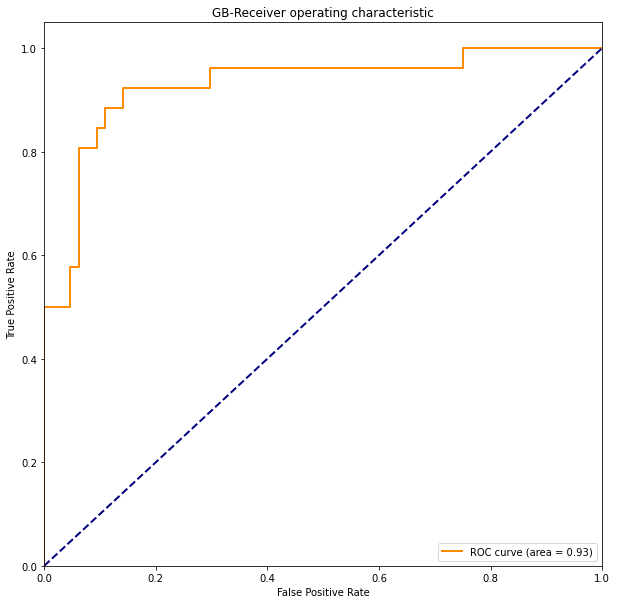

In [64]:
## GB ROC&AUC
gb_clf = GradientBoostingClassifier(max_depth=5)
gb_clf.fit(x_train,y_train)
y_score = gb_clf.predict_proba(x_test)[:, 1]###返回预测属于第二维（positive）标签的概率
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print("AUC值: ",roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GB-Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

朴素贝叶斯训练集准确率 : 79.43%
朴素贝叶斯测试集准确率 : 81.11%
朴素贝叶斯训练集精确率 : 78.72%
朴素贝叶斯测试集精确率 : 80.00%
朴素贝叶斯训练集召回率 : 52.86%
朴素贝叶斯测试集召回率 : 46.15%
朴素贝叶斯训练集F1值 : 63.25%
朴素贝叶斯测试集F1值 : 58.54%


<Figure size 432x288 with 0 Axes>

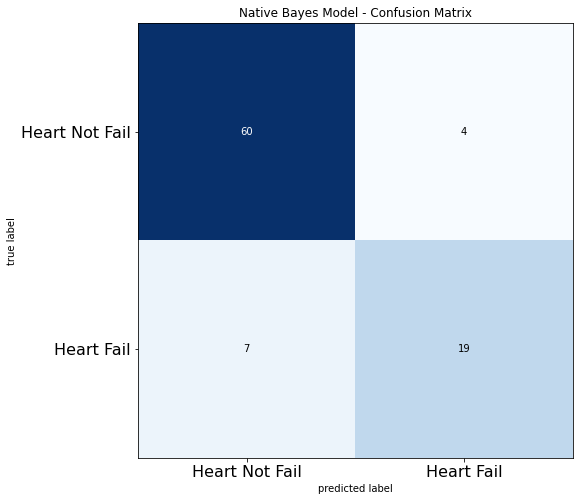

In [74]:
## 朴素贝叶斯
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)
nb_train_pred = nb_clf.predict(x_train)
nb_pred = nb_clf.predict(x_test)
nb_train_acc = accuracy_score(y_train, nb_train_pred)
nb_acc = accuracy_score(y_test, nb_pred)
accuracy_list.append(100*nb_acc)
nb_train_prec = precision_score(y_train, nb_train_pred)
nb_prec = precision_score(y_test, nb_pred)
precision_list.append(100*nb_prec)
nb_train_rec = recall_score(y_train, nb_train_pred)
nb_rec = recall_score(y_test, nb_pred)
recall_list.append(100*nb_rec)
nb_train_f1 = f1_score(y_train, nb_train_pred)
nb_f1 = f1_score(y_test, nb_pred)
f1_list.append(100*nb_f1)
print("朴素贝叶斯训练集准确率 :", "{:.2f}%".format(100*nb_train_acc))
print("朴素贝叶斯测试集准确率 :", "{:.2f}%".format(100*nb_acc))
print("朴素贝叶斯训练集精确率 :", "{:.2f}%".format(100*nb_train_prec))
print("朴素贝叶斯测试集精确率 :", "{:.2f}%".format(100*nb_prec))
print("朴素贝叶斯训练集召回率 :", "{:.2f}%".format(100*nb_train_rec))
print("朴素贝叶斯测试集召回率 :", "{:.2f}%".format(100*nb_rec))
print("朴素贝叶斯训练集F1值 :", "{:.2f}%".format(100*nb_train_f1))
print("朴素贝叶斯测试集F1值 :", "{:.2f}%".format(100*nb_f1))
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Native Bayes Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.show()

AUC值:  0.8665865384615385


<Figure size 432x288 with 0 Axes>

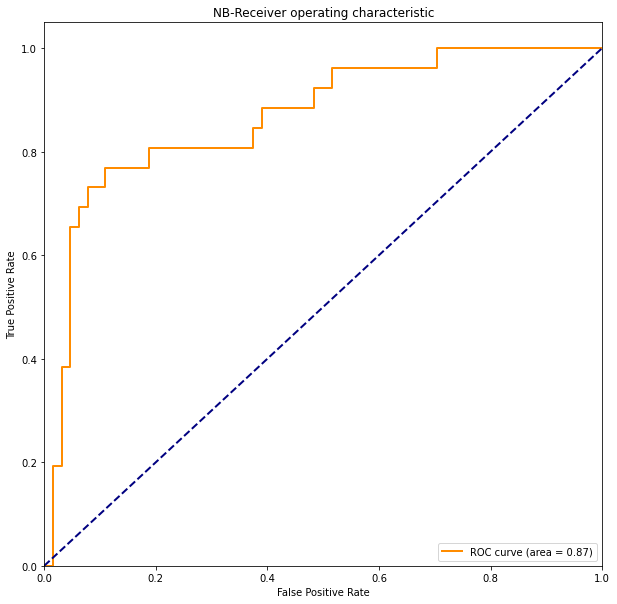

In [69]:
## NB ROC&AUC
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)
y_score = nb_clf.predict_proba(x_test)[:, 1]###返回预测属于第二维（positive）标签的概率
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print("AUC值: ",roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB-Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

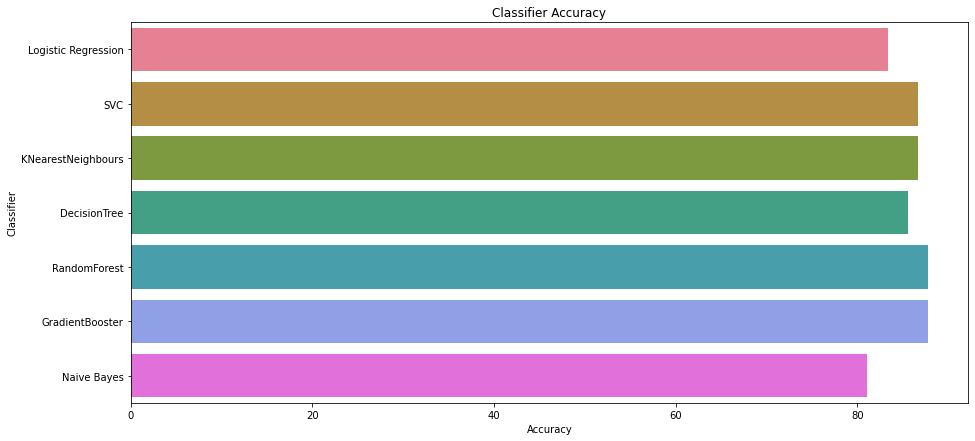

In [53]:
## 总结
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest', 'GradientBooster', 'Naive Bayes']
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x = accuracy_list,y = model_list,palette = "husl")
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.title('Classifier Accuracy')
plt.show()

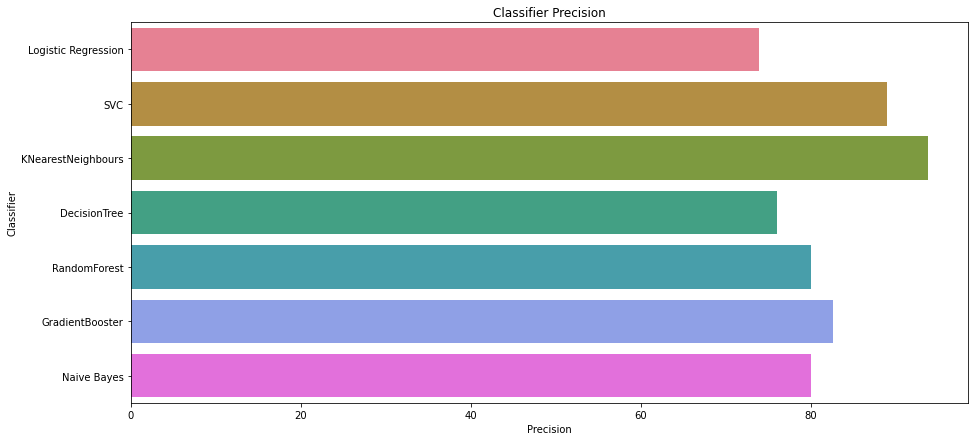

In [54]:
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x = precision_list,y = model_list,palette = "husl")
plt.xlabel("Precision")
plt.ylabel("Classifier")
plt.title('Classifier Precision')
plt.show()

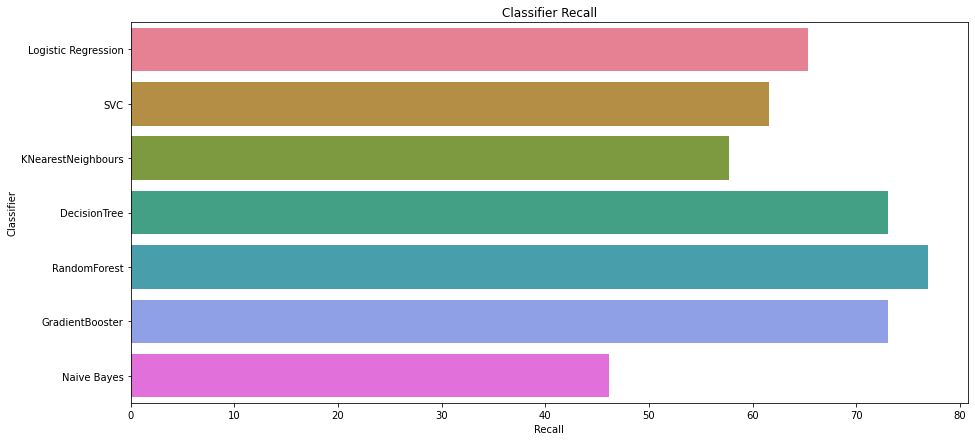

In [55]:
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x = recall_list,y = model_list,palette = "husl")
plt.xlabel("Recall")
plt.ylabel("Classifier")
plt.title('Classifier Recall')
plt.show()

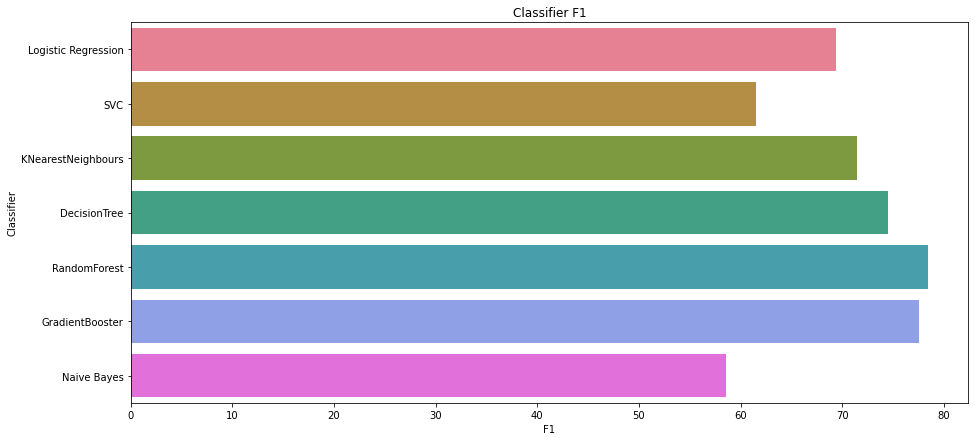

In [56]:
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x = f1_list,y = model_list,palette = "husl")
plt.xlabel("F1")
plt.ylabel("Classifier")
plt.title('Classifier F1')
plt.show()

In [5]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

## 划分训练集和测试集，比例为0.3,种子为1
Features = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
x = heart_data[Features]
y = heart_data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

model = ExtraTreesClassifier()
model.fit(x_train, y_train)
print(model.feature_importances_)

[0.09120228 0.02619315 0.07744099 0.03054267 0.13150812 0.02633902
 0.07753231 0.13021935 0.09156927 0.03080165 0.02360545 0.26304573]


In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## 划分训练集和测试集，比例为0.3,种子为1
Features = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
x = heart_data[Features]
y = heart_data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

model = LogisticRegression()
rfe = RFE(model,1)
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False  True False False False False]
[ 8  3 11  4  7  2 12  1 10  6  5  9]


随机森林训练集准确率 : 100.00%
随机森林测试集准确率 : 88.89%
随机森林训练集精确率 : 100.00%
随机森林测试集精确率 : 80.77%
随机森林训练集召回率 : 100.00%
随机森林测试集召回率 : 80.77%
随机森林训练集F1值 : 100.00%
随机森林测试集F1值 : 80.77%


<Figure size 432x288 with 0 Axes>

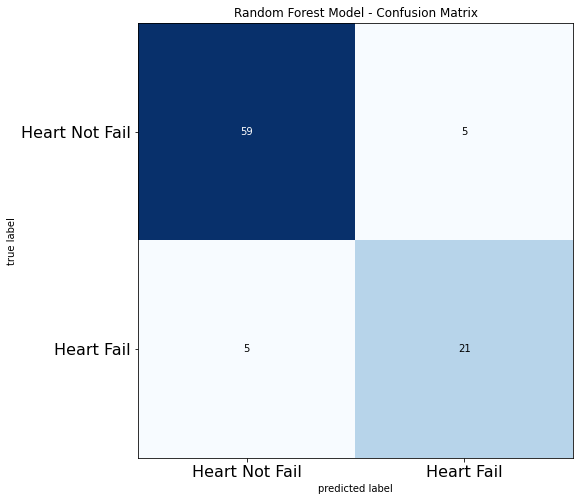

梯度提升训练集准确率 : 100.00%
梯度提升测试集准确率 : 86.67%
梯度提升训练集精确率 : 100.00%
梯度提升测试集精确率 : 75.00%
梯度提升训练集召回率 : 100.00%
梯度提升测试集召回率 : 80.77%
梯度提升训练集F1值 : 100.00%
梯度提升测试集F1值 : 77.78%


<Figure size 432x288 with 0 Axes>

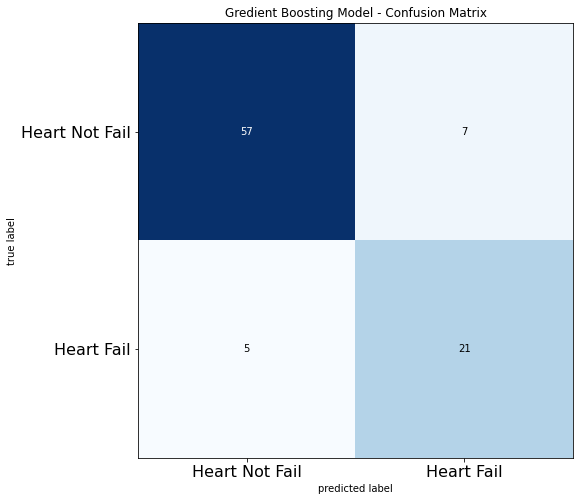

In [66]:
## 划分训练集和测试集，比例为0.3,种子为1
Features = ['ejection_fraction','serum_creatinine','time']
x = heart_data[Features]
y = heart_data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

## 随机森林
r_clf = RandomForestClassifier(n_estimators=10000)
r_clf.fit(x_train, y_train)
r_train_pred = r_clf.predict(x_train)
r_pred = r_clf.predict(x_test)
r_train_acc = accuracy_score(y_train, r_train_pred)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)
r_train_prec = precision_score(y_train, r_train_pred)
r_prec = precision_score(y_test, r_pred)
precision_list.append(100*r_prec)
r_train_rec = recall_score(y_train, r_train_pred)
r_rec = recall_score(y_test, r_pred)
recall_list.append(100*r_rec)
r_train_f1 = f1_score(y_train, r_train_pred)
r_f1 = f1_score(y_test, r_pred)
f1_list.append(100*r_f1)
print("随机森林训练集准确率 :", "{:.2f}%".format(100*r_train_acc))
print("随机森林测试集准确率 :", "{:.2f}%".format(100*r_acc))
print("随机森林训练集精确率 :", "{:.2f}%".format(100*r_train_prec))
print("随机森林测试集精确率 :", "{:.2f}%".format(100*r_prec))
print("随机森林训练集召回率 :", "{:.2f}%".format(100*r_train_rec))
print("随机森林测试集召回率 :", "{:.2f}%".format(100*r_rec))
print("随机森林训练集F1值 :", "{:.2f}%".format(100*r_train_f1))
print("随机森林测试集F1值 :", "{:.2f}%".format(100*r_f1))
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.show()

## 梯度提升
gb_clf = GradientBoostingClassifier(n_estimators=200,max_depth=6)
gb_clf.fit(x_train,y_train)
gb_train_pred = gb_clf.predict(x_train)
gb_pred = gb_clf.predict(x_test)
gb_train_acc = accuracy_score(y_train, gb_train_pred)
gb_acc = accuracy_score(y_test, gb_pred)
accuracy_list.append(100*gb_acc)
gb_train_prec = precision_score(y_train, gb_train_pred)
gb_prec = precision_score(y_test, gb_pred)
precision_list.append(100*gb_prec)
gb_train_rec = recall_score(y_train, gb_train_pred)
gb_rec = recall_score(y_test, gb_pred)
recall_list.append(100*gb_rec)
gb_train_f1 = f1_score(y_train, gb_train_pred)
gb_f1 = f1_score(y_test, gb_pred)
f1_list.append(100*gb_f1)
print("梯度提升训练集准确率 :", "{:.2f}%".format(100*gb_train_acc))
print("梯度提升测试集准确率 :", "{:.2f}%".format(100*gb_acc))
print("梯度提升训练集精确率 :", "{:.2f}%".format(100*gb_train_prec))
print("梯度提升测试集精确率 :", "{:.2f}%".format(100*gb_prec))
print("梯度提升训练集召回率 :", "{:.2f}%".format(100*gb_train_rec))
print("梯度提升测试集召回率 :", "{:.2f}%".format(100*gb_rec))
print("梯度提升训练集F1值 :", "{:.2f}%".format(100*gb_train_f1))
print("梯度提升测试集F1值 :", "{:.2f}%".format(100*gb_f1))
cm = confusion_matrix(y_test, gb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Fail","Heart Fail"], fontsize=16)
plt.show()